<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Bangalor_house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [514]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [515]:
df = pd.read_csv('/content/Bengaluru_House_Data.csv')

In [516]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [517]:
df.drop('society', inplace = True, axis = 1)

In [518]:
df.isnull().sum()

area_type         0
availability      0
location          1
size             16
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

In [519]:
df['balcony'].replace(np.nan, 0, inplace = True)

In [520]:
df['bath'].replace(np.nan, df['bath'].mean, inplace = True)

In [521]:
df.dropna(inplace = True)

In [522]:
df.shape

(13303, 8)

In [523]:
df.describe()

,balcony,price
count,13303.000000,13303.000000
mean,1.513719,112.584033
std,0.863189,148.993820
min,0.000000,8.000000
25%,1.000000,50.000000
50%,2.000000,72.000000
75%,2.000000,120.000000
max,3.000000,3600.000000


# Exploratory Data Analysis

<Axes: ylabel='area_type'>

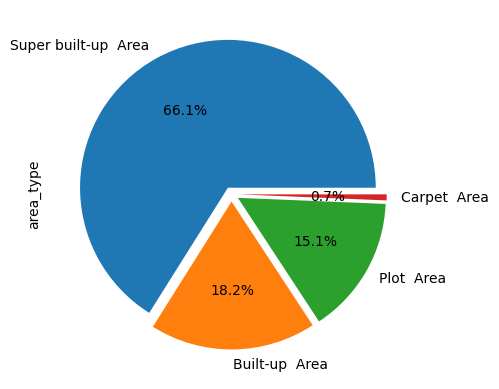

In [524]:
df['area_type'].value_counts().plot.pie(autopct = '%1.1f%%', explode = [0.05,0.05,0.05,0.05])

In [525]:
df['availability'].value_counts()

Ready To Move    10580
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 80, dtype: int64

<ipython-input-526-de5551dd629d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['price'])


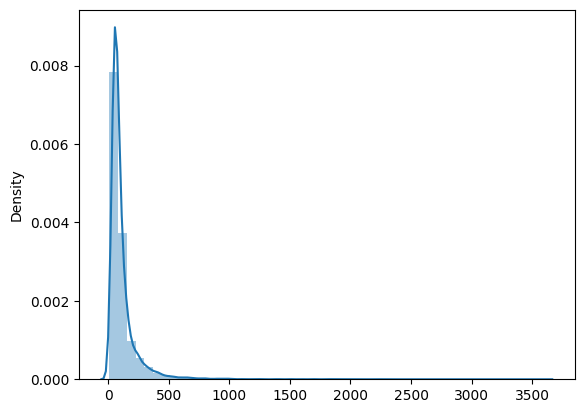

In [526]:
sns.distplot(x = df['price'])
plt.show()

The target variable aka price is highly skewed on the right, let's transform it so that it follows a gaussian normal distribution.

<ipython-input-527-16f0d51dbf4c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df.price))


<Axes: xlabel='price', ylabel='Density'>

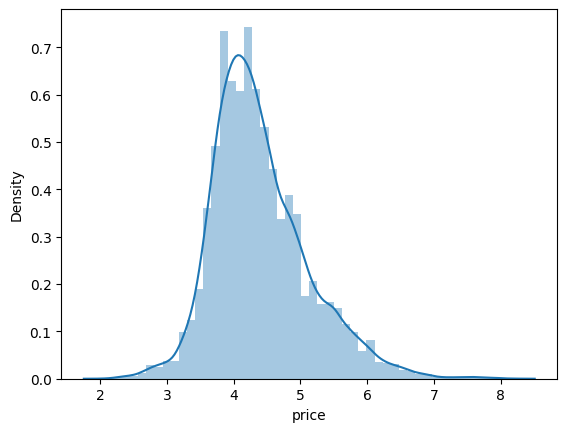

In [527]:
sns.distplot(np.log(df.price))

In [528]:
df['LogofPrice'] = df.price
df.drop(['price'], axis=1, inplace=True)
print("Skewness ", df['LogofPrice'].skew())
print("Kurtosis", df["LogofPrice"].kurt())

Skewness  8.069469257969278
Kurtosis 108.23512828397304


In [529]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,LogofPrice
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [530]:
def calculate_mean(range_str):
    values = range_str.split(' - ')
    return (float(values[0]) + float(values[1])) / 2

In [531]:
df['total_sqft'] = df['total_sqft'].apply(lambda x: calculate_mean(x) if ' - ' in x else x)

In [532]:
# Convert 'total_sqft' column to numeric, coercing non-numeric values to NaN
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

# Drop rows with NaN values in the 'total_sqft' column
df.dropna(subset=['total_sqft'], inplace=True)

In [533]:
# Convert 'bath' column to numeric, coercing non-numeric values to NaN
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

# Convert valid numeric values to integers
df['bath'] = df['bath'].astype('Int64', errors='ignore')

# Drop rows with NaN values in the 'total_sqft' column
df.dropna(subset=['bath'], inplace=True)

In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13200 non-null  object 
 1   availability  13200 non-null  object 
 2   location      13200 non-null  object 
 3   size          13200 non-null  object 
 4   total_sqft    13200 non-null  float64
 5   bath          13200 non-null  Int64  
 6   balcony       13200 non-null  float64
 7   LogofPrice    13200 non-null  float64
dtypes: Int64(1), float64(3), object(4)
memory usage: 941.0+ KB


In [535]:
df.corr()['LogofPrice']

<ipython-input-535-28225d417a1a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['LogofPrice']


total_sqft    0.574330
bath          0.455998
balcony       0.021990
LogofPrice    1.000000
Name: LogofPrice, dtype: float64

<ipython-input-536-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

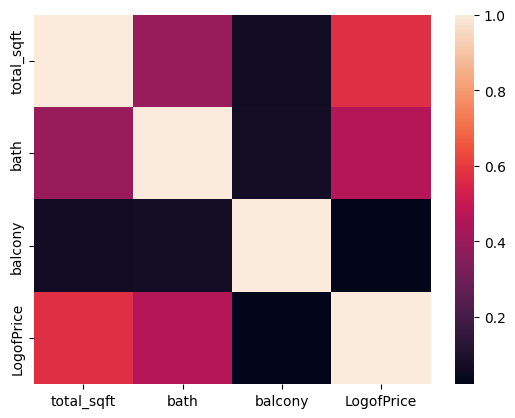

In [536]:
sns.heatmap(df.corr())

In [537]:
print(df['area_type'].unique())
print("*****************************")
print(df['availability'].unique())
print("******************************")
print(df['location'].unique())
print("*********************************")
print(df["size"].unique())

['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
*****************************
['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '18-Apr' '20-Aug' '19-Mar' '17-Sep'
 '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan' '18-Aug' '19-Jan'
 '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep' '17-May' '17-Jun'
 '18-Oct' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun' '22-Jun'
 '19-Jul' '21-Feb' '19-May' '17-Nov' '20-Oct' '20-Jun' '19-Feb' '21-Oct'
 '21-Jan' '17-Mar' '17-Apr' '22-May' '19-Oct' '21-Jul' '21-Nov' '21-Mar'
 '16-Dec' '22-Mar' '20-Jan' '21-Sep' '21-Aug' '14-Nov' '19-Nov' '15-Nov'
 '16-Jul' '15-Jun' '17-Feb' '20-Nov' '20-Jul' '16-Sep' '15-Oct' '20-Feb'
 '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan' '16-Nov' '20-Apr' '16-Jan'
 '14-Jul']
******************************
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur exten

In [538]:
#displaying the counts of each
print(df['area_type'].value_counts())
print("*****************************")
print(df['availability'].value_counts)
print("******************************")
print(df['location'].value_counts)
print("*********************************")
print(df["size"].value_counts())

Super built-up  Area    8729
Built-up  Area          2394
Plot  Area              1991
Carpet  Area              86
Name: area_type, dtype: int64
*****************************
<bound method IndexOpsMixin.value_counts of 0               19-Dec
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
13315    Ready To Move
13316    Ready To Move
13317    Ready To Move
13318           18-Jun
13319    Ready To Move
Name: availability, Length: 13200, dtype: object>
******************************
<bound method IndexOpsMixin.value_counts of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 1320

In [539]:
df = df.drop_duplicates()

# Data Cleaning

In [540]:
df['size'].str.split().iloc[2][0]

'3'

In [541]:
'''size = []
for i in range(len(df['size'])):
  size.append(df['size'].str.split().iloc[i][0])'''

"size = []\nfor i in range(len(df['size'])):\n  size.append(df['size'].str.split().iloc[i][0])"

In [542]:
size = [value.split()[0] for value in df['size']]

In [543]:
df['size'] = size

<ipython-input-543-393f18834317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = size


In [544]:
df['size'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [545]:
df['size'] = df['size'].astype(int)

<ipython-input-545-be481a495144>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = df['size'].astype(int)


In [546]:
df['size'].mean()

2.8164977834072196

In [547]:
df.sample(5)

,area_type,availability,location,size,total_sqft,bath,balcony,LogofPrice
4140,Super built-up Area,Ready To Move,Thigalarapalya,3,2072.0,4,2.0,147.0
6630,Super built-up Area,Ready To Move,Sanjay nagar,3,1450.0,3,2.0,75.0
10778,Super built-up Area,Ready To Move,Marathahalli,3,1839.0,3,2.0,130.0
1518,Super built-up Area,Ready To Move,Jalahalli,2,1694.0,2,2.0,125.0
6075,Plot Area,Ready To Move,Raja Rajeshwari Nagar,4,1200.0,4,1.0,160.0


In [548]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [549]:
d1 = pd.get_dummies(df['area_type'], drop_first = True)

In [550]:
df = pd.concat([df, d1], axis = 1)

In [551]:
df.drop('area_type', axis = 1, inplace = True)

In [552]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12632 entries, 0 to 13318
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   availability          12632 non-null  object 
 1   location              12632 non-null  object 
 2   size                  12632 non-null  int64  
 3   total_sqft            12632 non-null  float64
 4   bath                  12632 non-null  Int64  
 5   balcony               12632 non-null  float64
 6   LogofPrice            12632 non-null  float64
 7   Carpet  Area          12632 non-null  uint8  
 8   Plot  Area            12632 non-null  uint8  
 9   Super built-up  Area  12632 non-null  uint8  
dtypes: Int64(1), float64(3), int64(1), object(2), uint8(3)
memory usage: 838.8+ KB


In [553]:
df['availability'] = [1 if val == 'Ready To Move' else 0 for val in df['availability']]

In [554]:
df.head(5)

,availability,location,size,total_sqft,bath,balcony,LogofPrice,Carpet Area,Plot Area,Super built-up Area
0,0,Electronic City Phase II,2,1056.0,2,1.0,39.07,0,0,1
1,1,Chikka Tirupathi,4,2600.0,5,3.0,120.00,0,1,0
2,1,Uttarahalli,3,1440.0,2,3.0,62.00,0,0,0
3,1,Lingadheeranahalli,3,1521.0,3,1.0,95.00,0,0,1
4,1,Kothanur,2,1200.0,2,1.0,51.00,0,0,1


In [555]:
df['price_per_sqft']=df['LogofPrice']*1000000/df['total_sqft']
df.head()

,availability,location,size,total_sqft,bath,balcony,LogofPrice,Carpet Area,Plot Area,Super built-up Area,price_per_sqft
0,0,Electronic City Phase II,2,1056.0,2,1.0,39.07,0,0,1,36998.106061
1,1,Chikka Tirupathi,4,2600.0,5,3.0,120.00,0,1,0,46153.846154
2,1,Uttarahalli,3,1440.0,2,3.0,62.00,0,0,0,43055.555556
3,1,Lingadheeranahalli,3,1521.0,3,1.0,95.00,0,0,1,62458.908613
4,1,Kothanur,2,1200.0,2,1.0,51.00,0,0,1,42500.000000


In [556]:
df['location']=df['location'].apply(lambda x: x.strip())
location_count = df['location'].value_counts()

In [557]:
location_count_less_10 = location_count[location_count<=10]
location_count_less_10

Nagappa Reddy Layout              10
Naganathapura                     10
BTM 1st Stage                     10
Marsur                            10
Vasanthapura                      10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Kannur                             1
Abshot Layout                      1
Name: location, Length: 1055, dtype: int64

In [558]:
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10  else x)

In [559]:
df['location'].value_counts()

other               2917
Whitefield           516
Sarjapur  Road       372
Electronic City      288
Kanakpura Road       233
                    ... 
Tindlu                11
Doddaballapur         11
Doddakallasandra      11
HAL 2nd Stage         11
Nehru Nagar           11
Name: location, Length: 233, dtype: int64

In [560]:
data=df[((df['total_sqft']/df['size'])>=300)]
data.describe()

,availability,size,total_sqft,bath,balcony,LogofPrice,Carpet Area,Plot Area,Super built-up Area,price_per_sqft
count,11898.000000,11898.000000,11898.000000,11898.0,11898.000000,11898.000000,11898.000000,11898.000000,11898.000000,1.189800e+04
mean,0.788536,2.659943,1602.942671,2.576567,1.527904,113.239115,0.006892,0.112624,0.686670,6.374201e+04
std,0.408364,0.988550,1285.000132,1.093846,0.854126,155.176910,0.082734,0.316146,0.463867,4.238186e+04
min,0.000000,1.000000,300.000000,1.0,0.000000,9.000000,0.000000,0.000000,0.000000,2.678298e+03
25%,1.000000,2.000000,1116.000000,2.0,1.000000,50.000000,0.000000,0.000000,0.000000,4.250000e+04
50%,1.000000,3.000000,1305.000000,2.0,2.000000,70.000000,0.000000,0.000000,1.000000,5.333333e+04
75%,1.000000,3.000000,1710.000000,3.0,2.000000,120.000000,0.000000,0.000000,1.000000,6.977601e+04
max,1.000000,16.000000,52272.000000,16.0,3.000000,3600.000000,1.000000,1.000000,1.000000,1.764706e+06


In [561]:
data.shape

(11898, 11)

In [562]:
data.price_per_sqft.describe()

count    1.189800e+04
mean     6.374201e+04
std      4.238186e+04
min      2.678298e+03
25%      4.250000e+04
50%      5.333333e+04
75%      6.977601e+04
max      1.764706e+06
Name: price_per_sqft, dtype: float64

In [563]:
def remove_outliers_sqft(df):
    df_output=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df],ignore_index=True)
    return df_output
data=remove_outliers_sqft(data)
data.describe()

,availability,size,total_sqft,bath,balcony,LogofPrice,Carpet Area,Plot Area,Super built-up Area,price_per_sqft
count,9810.000000,9810.000000,9810.000000,9810.0,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000
mean,0.789704,2.582365,1516.174197,2.489093,1.540979,92.634072,0.006320,0.075025,0.719674,57128.152991
std,0.407539,0.909278,894.388994,0.997567,0.838834,87.912971,0.079251,0.263446,0.449181,22917.659080
min,0.000000,1.000000,300.000000,1.0,0.000000,10.000000,0.000000,0.000000,0.000000,12500.000000
25%,1.000000,2.000000,1107.000000,2.0,1.000000,49.812500,0.000000,0.000000,0.000000,42843.232717
50%,1.000000,2.000000,1295.500000,2.0,2.000000,68.000000,0.000000,0.000000,1.000000,52083.333333
75%,1.000000,3.000000,1656.000000,3.0,2.000000,100.000000,0.000000,0.000000,1.000000,64963.646704
max,1.000000,16.000000,30400.000000,16.0,3.000000,2200.000000,1.000000,1.000000,1.000000,245098.039216


In [564]:
def bhk_outlier_remover(df):
    exclude_indices = np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk,bhk_df in location_df.groupby('size'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std' : np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]

            }
        for bhk,bhk_df in location_df.groupby('size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [565]:
data=bhk_outlier_remover(data)

In [566]:
data

,availability,location,size,total_sqft,bath,balcony,LogofPrice,Carpet Area,Plot Area,Super built-up Area,price_per_sqft
0,0,1st Block Jayanagar,4,2850.0,4,1.0,428.0,0,0,1,150175.438596
1,0,1st Block Jayanagar,3,1630.0,3,2.0,194.0,0,0,1,119018.404908
2,1,1st Block Jayanagar,3,1875.0,2,3.0,235.0,0,0,1,125333.333333
3,0,1st Block Jayanagar,3,1200.0,2,0.0,130.0,0,0,0,108333.333333
4,0,1st Block Jayanagar,2,1235.0,2,2.0,148.0,0,0,1,119838.056680
...,...,...,...,...,...,...,...,...,...,...,...
9800,1,other,2,1155.0,2,1.0,64.0,0,0,1,55411.255411
9802,0,other,2,1200.0,2,3.0,70.0,1,0,0,58333.333333
9803,1,other,1,1800.0,1,1.0,200.0,0,0,1,111111.111111
9806,0,other,1,812.0,1,0.0,26.0,0,1,0,32019.704433


In [567]:
data.drop(columns=['size','price_per_sqft'],inplace=True)

# Model Building


In [568]:
X=data.drop(columns=['LogofPrice'])
y=data['LogofPrice']

In [569]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [588]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [571]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [572]:
print(X_train.shape)
print(X_test.shape)

(5585, 8)
(1397, 8)


In [573]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [574]:
scaler=StandardScaler()

In [589]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
pipe=make_pipeline(column_trans,scaler,lr)
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

In [590]:
y_pred_lr=pipe.predict(X_test)

In [591]:
r2_score(y_test,y_pred_lr)

0.8076111393413706

In [592]:
ridge = Ridge()

pipe=make_pipeline(column_trans,scaler,ridge)
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('minmaxscaler', MinMaxScaler()), ('ridge', Ridge())])

In [593]:
y_pred_ridge=pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8142366290278739

In [594]:
lasso=Lasso()

pipe=make_pipeline(column_trans,scaler,lasso)
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('minmaxscaler', MinMaxScaler()), ('lasso', Lasso())])

In [595]:
y_pred_lasso=pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.6437589530777379

In [596]:
print('No Regularisation:', r2_score(y_test,y_pred_lr))
print('Ridge:', r2_score(y_test,y_pred_ridge))
print('Lasso:', r2_score(y_test,y_pred_lasso))

No Regularisation: 0.8076111393413706
Ridge: 0.8142366290278739
Lasso: 0.6437589530777379
